**<h2>Data Pre-processing Techniques</h2>**

Data preprocessing involves several transformations that are applied to raw data to make it more amenable for learning.It is carried out before using it for model training or prediction.


* Data Cleaning
    
    * Data Imputation
    * Feature scaling

* Feature transformation
    
    * Polynomial Features
    * Discretization
    * Handling categorical features
    * Custom Transformers
    * Composite Transformers
        * Apply transformation to diverse features
        * TargetTransformedRegressor

* Feature Selection

    * Filter based feature selection
    * Wrapper based feature selection    

* Feature Extraction

    * PCA

The transformation are applied in a specific order can be specified via **`Pipeline`**.We need to apply transformations based on the feature type.**`FeatureUnion`** helps us perform that task and combine outputs from multiple transformations into single transformed feature matrix.    


<h2>Importing basic library </h2>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

## **1. Feature Extraction**

### DictVectorize:
Many times the data is present as a list of dictionary objects.ML algorithim expect the data in matrix form with shape(n,m) where n is the number of samples and m is the number of features 

`DictVectorizer` **converts** a list of dictionary objects to feature matrix

In [43]:
data=[
      {'age':4,'height':96.0},
      {'age':1,'height':73.9},
      {'age':3,'height':88.9},
      {'age':2,'height':81.6}
]

In [44]:
from sklearn.feature_extraction import DictVectorizer

dv=DictVectorizer(sparse=False)
data_transformed=dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [45]:
data_transformed.shape

(4, 2)

As we can se that the data is transformed into the feature matrix from 4 samples with 2 feature each i.e shape(4,2)

##**2. Data Imputation**
    
* Many machine learning algorithims need full feature matrix and they may not work in presence of missing data
* Data imputation identifies missing values in each feature of the dataset and replaces them with an appropriate value based on fixed strategy such as
    * `mean` or `median` or `mode` of that feature
    *  use specified constant value

Sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose    

In [46]:
from sklearn.impute import SimpleImputer

Some of it's important parameter:
* `missing_values`:Could be int,float,str,np.nan or None.Default is np.nan
* `strategy`:string,default is `mean`
    * mean
    * meadian
    * most_frequent
    * conastant
* `add_indicator` :is boolean parameter that when set to true returns missing value indicators in `indicator_` member variable

In [47]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols)

In [48]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [49]:
(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [50]:
print("Unique values in ca:",heart_data.ca.unique())
print("Unique values in thal:",heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


In [51]:
print("# missing value in ca:",
      heart_data.loc[heart_data.ca=='?','ca'].count())
print("# missing value in thal:",
      heart_data.loc[heart_data.thal=='?','thal'].count())


# missing value in ca: 4
# missing value in thal: 2


In [52]:
heart_data.replace('?',np.nan,inplace=True)

In [53]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',add_indicator=True)
imputer=imputer.fit(heart_data)
heart_data_imputed_with_indicator=imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


##**3. Feature scaling**

Feature scaling transforms feature values such that all the features are on the same scale

Benefits:
  * Enables faster convergence in iterative omptimization
  * The performance of ML algorithim such as SVM,K-NN and K-mefans etc that compute euclidien distance among input samples gets impacted if the features are not scaled

Methods:
  * Standardization
  * Normalization
  * MaxAbscaler 

**Note:** Tree based ML algorithim are not affected by feature scaling


In [54]:
cols=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=cols)

In [55]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##Step1[optional] Convert non-numerical atribute to numericals type


In [56]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [57]:
abalone_data=abalone_data.replace({"Sex":{"M":1,"F":2,"I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


##Step2: Seperate labels from feature

In [58]:
y=abalone_data.pop("Rings")
print("The dataframe object after deleting the column")
abalone_data.info()

The dataframe object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


##Step3: Examine feature scales

In [59]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


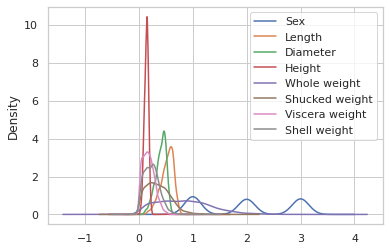

In [60]:
ax=abalone_data.plot.kde()

##Step4: Scaling

**Normalization**
* `MaxAbsoluteScaler` transforms features in range [-1,1]
* `MinMaxScalar` transforms feature in range [0,1]

**MaxAbsoluteScaler**: x'=x/MaxAbsoluteValue

In [61]:
x=np.array([4,2,5,-2,-100]).reshape(-1,1)
print(x) 

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [62]:
from sklearn.preprocessing import MaxAbsScaler

mas=MaxAbsScaler()
x_new=mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


**MinMaxScalar**
$X_{new}$=$\frac{X_{old}-X_{min}}{X_{max}-X_{min}}$

* $X_{old}$ is the old value of data point which is rescaled to $X_{new}$
* $X_{min}$ is minimum value of feature X
* $X_{max}$ is maximum value of feature X


In [63]:
from sklearn.preprocessing import MinMaxScaler
X=abalone_data
mm=MinMaxScaler()
X_normalized=mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [64]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

**Standardization**

$X_{new}$=$\frac{X_{old}-mean}{Standard Deviation}$


In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_standardized=ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [66]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

##**4. add_dummy_feature**

In [67]:
x=np.array(
    [[7,1],
    [1,8],
    [2,0],
    [9,6]]
)
from sklearn.preprocessing import add_dummy_feature
x_new=add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


##**5. Custom transformers**

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing

* The dataset consists of heterogeneous data type(eg. raster images and text captions)
* The dataset is stored in pandas.Dataframe

In [68]:
from sklearn.preprocessing import FunctionTransformer

In [69]:
wine_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [70]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


let's usse np.loglp which returns natural alogarithm of(1+the feature value)

In [71]:
transformer=FunctionTransformer(np.log1p,validate=True)
wine_data_transformed=transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed,columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


##**6. PolyNomial Features**##
check out Demonstration of data transformation vedio

##**7. Discretization**##
(also known as quantization or binning) provides a way to partition continous features into discrete values

* One-hot enconded discretized features can make a model more expressive while maintaining interpretability
* For instance,pre-processing with a discretizer can introduce nolinearity to linear models

In [72]:
#KBinsDiscretizer discretizes feature into k bins
from sklearn.preprocessing import KBinsDiscretizer

In [73]:
wine_data=wine_data.copy()

enc=KBinsDiscretizer(n_bins=10,encode="onehot")
X=np.array(wine_data['chlorides']).reshape(-1,1)
X_binned=enc.fit_transform(X)

In [74]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [75]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

##**8. Handling Categorical Features**
We need convert the categorical features into numeric features.
* Ordinal enconding
* One-hot encoding
* Label encoder
* Using dummy variables

###**Ordinal Encoding**

Categorical features are those that contain categories or groups.These are non-numerical features and need to be converted into appropriate from before they feeding them for training on ML model

we can give numbers to model according to category
Problem: suppose Punjab has number 1 and himachal as 2 maybe model can think of himachal as twiice of punjab

###**One -hot encoding**
This approach consists of creating an additional feature for each label present in the categorical feature



In [76]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [77]:
cols=['sepal length','sepal width','petal length','petal width','label']
iris_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three class labels .Let's convert them to one hot vectors

In [79]:
onehotencoder=OneHotEncoder(categories='auto')
print('Shape of y before encoding',iris_data.label.shape)

iris_labels=onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))
print('Shape of y after encoding',iris_labels.shape)

print("First 5 labels:")
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [80]:
enc=OrdinalEncoder()
iris_labels=np.array(iris_data['label'])

iris_labels_transformed=enc.fit_transform(iris_labels.reshape(-1,1))
print("Unique labels",np.unique(iris_labels_transformed))

print("\nFirst 5 labels:")
print(iris_labels_transformed[:5])

Unique labels [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


##**LabelEncoder**

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
iris_labels=np.array(iris_data['label'])

enc=LabelEncoder()
label_integer=enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##**MultilabelBinarizer**
Encodes categorical features with value between 0 and k-1 where k in number of calsses

In [83]:
movie_genres=[{'action','comedy'},
             {'comedy'},
             {'action','thriller'},
             {'science-fiction','action','thriller'}]

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

Can be done 
##**Using dummy variables**

##**9. Composite Transformers**
check out the week 2 second demonstration vedio

##**10. Feature Selection**

sklearn.feature_selection modulehas useful API's to select features/reduce dimensionality,either to improve estimator's accuracy scores or to boost their performance on very high dimensional datasets

##Filter based methods

##Variance threshhold
This transformer helps to only high variance features by providing a certain threshold
* Features with variance greater or equal to threshold value are kept rest are removed
* By default it removes any feature with same value i.e 0 variance

In [85]:
data=[
      {'age':4,'height':96.0},
      {'age':1,'height':73.9},
      {'age':3,'height':88.9},
      {'age':2,'height':81.6}
]
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)
data_transformed=dv.fit_transform(data)
np.var(data_transformed,axis=0)

array([ 1.25 , 67.735])

In [86]:
from sklearn.feature_selection import VarianceThreshold

vt=VarianceThreshold(threshold=9)
data_new=vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

Age feature is removed because it's variance is below the threshold

##SlectkBest
it selects k highest sscoring features based on function and removes the rest of features

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,mutual_info_regression

X_california,y_california=fetch_california_housing(return_X_y=True)

#selecting subset of data

X,y=X_california[:2000,:],y_california[:2000]
print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


In [88]:
skb=SelectKBest(mutual_info_regression,k=3)
X_new=skb.fit_transform(X,y)
print(f'Shape of feature matrix before feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 3)


In [89]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

##SlectPercentile
Very similar to SelectKBest from previous section the only difference is ,it selects top percentile of all featuers and drops the rest of the featuers
* It also use a scoring function to decide importance of features

In [90]:
from sklearn.feature_selection import SelectPercentile
sp=SelectPercentile(mutual_info_regression,percentile=30)
X_new=sp.fit_transform(X,y)
print(f'Shape of feature matrix before feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 3)


In [91]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

##GenericUnivariateSelct
It applies univariate feature selection with a certain strategy,which is passed to the API via mode Parameter.the mode can take one of the following values: `percentile`,`k_best`,`fpr`(false positive rate),`fdr`(false discovery rate),`fwe`(family wise error rate)

In [92]:
from sklearn.feature_selection import GenericUnivariateSelect
gus=GenericUnivariateSelect(mutual_info_regression,mode='k_best',param=3)
X_new=gus.fit_transform(X,y)
print(f'Shape of feature matrix before feature selection:{X.shape}')
print(f'Shape of feature matrix before feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 8)
Shape of feature matrix before feature selection:(2000, 3)


##Wrapper based methods

##RFE(Recursive Feature Elimination)

* STEP1: fits a model and
* STEP2: Ranks the feature afterwards it removes one or more features(depending upon step parameter)

These two steps are repeated until desired number of feature are selected

In [93]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=3,step=1)
selector=selector.fit(X,y)

#support_attribute is a boolean array
#marking which features are selected
print(selector.support_)

# rank of each feature
# if it's value is '1' then it is selected
# feature with rank 2 onwards are ranked least.
print(f' rank of each feature is :{selector.ranking_}')

[ True False False False False False  True  True]
 rank of each feature is :[1 5 4 3 6 2 1 1]


In [94]:
X_new=selector.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


##**RFE-CV**
Same as RFE but it adds just the cross validations  

##**SequentialFeatureSelection**
it performs feature selection or deselecting features one by one in greedy manner


In [95]:
from sklearn.feature_selection import SequentialFeatureSelector

In [96]:
%%time
estimator=LinearRegression()

sfs=SequentialFeatureSelector(estimator,n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 142 ms, sys: 0 ns, total: 142 ms
Wall time: 142 ms


In [97]:
%%time
estimator=LinearRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=3,direction='backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 319 ms, sys: 164 ms, total: 484 ms
Wall time: 299 ms


* Bith forward and backward selection methods select the same features
* The backward selection method takes longer than forward selection method

Basicaly called feature reduction or dimentionality reduction
##**PCA**
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance

In [98]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [99]:
 print(f'The {pca.n_components_} principal axes are \n',pca.components_)

The 2 principal axes are 
 [[ 3.58746278e-04 -5.26626273e-03 -3.55739438e-04 -1.04636644e-04
   9.99985993e-01  1.07189337e-04 -3.72926795e-05 -3.18638902e-05]
 [ 2.83042309e-02 -9.96787172e-01  7.04618553e-02  1.11176863e-02
  -5.23215008e-03 -1.02817045e-03  1.45200590e-02  1.69252465e-02]]


In [100]:
pca=PCA(n_components=4)
pca.fit(X)
X_pca=pca.transform(X)
print('Original shape: ',X.shape)
print('transformed shape',X_pca.shape)

Original shape:  (2000, 8)
transformed shape (2000, 4)


##**Chaining Transformers**

If we don't do all the above steps in sequence than it will lead to loss of data or something else 

##Pipeline
So pipeline module of Scikit-learn is a tool that makes the preprocessing simple and easy by combining the transformations in a pipe

The preprocessing transformations applied one after another on the input feature matrix.

The sklearn.pipeline module provides untilities to build a composite estimator as chain of transformers and estimators

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators=[
            ('simpleImputer',SimpleImputer()),
            ('standardScaler',StandardScaler())
]

pipe=Pipeline(steps=estimators)

or can be done by `make_pipeline`

In [102]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(SimpleImputer(),
                   StandardScaler())


In [103]:
from sklearn.decomposition import PCA
estimator =[
            ('simpleImputer',SimpleImputer()),
            ('pca',PCA()),
            ('regressor',LinearRegression())
]
pipe=Pipeline(steps=estimator)

In [104]:
print(len(pipe.steps))

3


In [105]:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


In [106]:
 pipe['pca']

PCA()

Setting up parametes of transformers inside pipeline

In [107]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

##**FeatureUnion**

Concatenates results of multiple transforfmers object

In [108]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline=Pipeline ([('selector',ColumnTransformer ([('select_first_4',
                                                            'passthrough',
                                                           slice(0,4))])),
                          ('imputer', SimpleImputer (strategy="median")),
                          ('std scaler', StandardScaler()),
])
cat_pipeline=ColumnTransformer ([('label binarizer', LabelBinarizer(),141),
])
full_pipeline=FeatureUnion(transformer_list=
                              [("num_pipeline", num_pipeline),
                               ("cat pipeline", cat_pipeline),
])

In [109]:
from sklearn import set_config
set_config(display='diagram')
#display HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std scaler',
                                                 StandardScaler())])),
                               ('cat pipeline',
                                ColumnTransformer(transformers=[('label '
                                                                 'binarizer',
                                                                 LabelBinarizer(),
                                                                 141)]))])

##**Handling imbalanced data**

Imbalanced datasets are those where one class is very less represented than the other class.This kind of data results in less efficient ML algorithim

Two approaches:
* Undersampling
* Oversampling


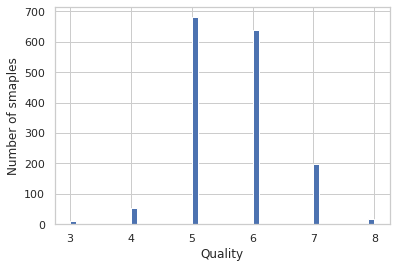

In [110]:
wine_data=pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
    "winequality-red.csv",
    sep=";")
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of smaples')
plt.show()

##UnderSampling
study it from vedio

##**Oversampling**

In [112]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X=wine_data.drop(['quality'],axis=1)
y=wine_data['quality']
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)

print ('original dataset shape:', Counter(y))
print ('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


Oversampling using SMOTE

In [113]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
X_sm,y_sm=oversample.fit_resample(X,y)
counter=Counter(y_sm)
counter

Counter({3: 681, 4: 681, 5: 681, 6: 681, 7: 681, 8: 681})

Types of SMOTE:
* Borderine SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling (ADASYN)